# Birth Rate Analysis

In [2]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load dataset
data = pd.read_csv('births.csv')
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [9]:
# check for the missing data
(data.isnull().sum()/len(data))*100

year      0.000000
month     0.000000
day       3.087412
gender    0.000000
births    0.000000
dtype: float64

In [10]:
data['day'].notnull().sum()/len(data['day'])

0.9691258763748634

In [12]:
# summarized statistics
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [14]:
data['day'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

In [16]:
data.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [17]:
data['day'].value_counts()

27.0    480
25.0    480
2.0     480
3.0     480
4.0     480
5.0     480
6.0     480
7.0     480
8.0     480
10.0    480
12.0    480
14.0    480
16.0    480
20.0    480
24.0    480
28.0    480
17.0    480
23.0    480
9.0     480
21.0    480
11.0    480
13.0    480
15.0    480
18.0    480
22.0    480
26.0    480
19.0    480
1.0     480
29.0    464
30.0    450
31.0    363
99.0    350
Name: day, dtype: int64

In [20]:
data['day'].median()

16.0

In [23]:
data[data['day']==99]

,year,month,day,gender,births
62,1969,1,99.0,F,26
63,1969,1,99.0,M,38
126,1969,2,99.0,F,42
127,1969,2,99.0,M,48
190,1969,3,99.0,F,64
...,...,...,...,...,...
14572,1988,4,99.0,F,1
14635,1988,5,99.0,F,1
14696,1988,6,99.0,F,1
14697,1988,6,99.0,M,1


In [30]:
data['day'].fillna(0, inplace= True)

In [33]:
data['decade'] = 10 * (data['year'] // 10)
data.tail()

,year,month,day,gender,births,decade
15542,2008,10,0.0,M,183219,2000
15543,2008,11,0.0,F,158939,2000
15544,2008,11,0.0,M,165468,2000
15545,2008,12,0.0,F,173215,2000
15546,2008,12,0.0,M,181235,2000


In [64]:
data['decade'].unique()

array([1960, 1970, 1980], dtype=int64)

In [34]:
data.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


From here we see that there are more male born in these decade than female

In [38]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

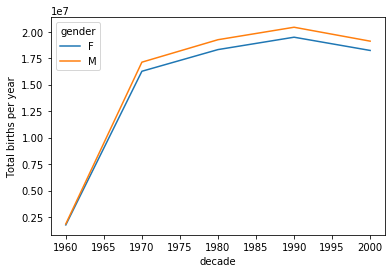

In [39]:
data.pivot_table('births', index='decade', columns='gender', aggfunc='sum').plot()
plt.ylabel('Total births per year')
plt.show()

In [42]:
quartiles = np.percentile(data['births'], [25, 50, 75])
mean = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0])

In [49]:
data = data.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
data.index = pd.to_datetime(10000 * data.year + 100 * data.month + data.day,
                              format='%Y%m%d')
data['day of week'] = data.index.dayofweek

<font color='blue'> <strong>check why they take out the whole decade of 2000 and others </strong>
</font>

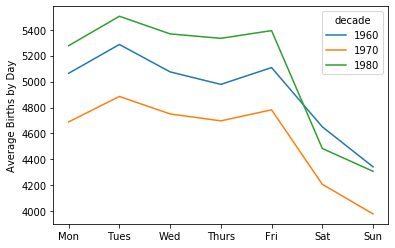

In [60]:
births_day = data.pivot_table('births', index='day of week',columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

From this we see that there are more birth on weekdays than in weekends. 

Note that the 1990s and 2000s are missing because the CDC data contains only the month of birth starting in 1989.

In [69]:
births_month = data.pivot_table('births', [data.index.month, data.index.day])
display(births_month.head())

births_month.index = [pd.datetime(1980, month, day)
                      for (month, day) in births_month.index]
births_month.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

,births
1980-01-01,4009.225
1980-01-02,4247.400
1980-01-03,4500.900
1980-01-04,4571.350
1980-01-05,4603.625


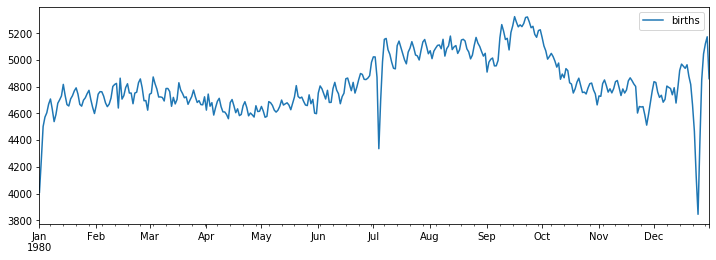

In [70]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()

This plot show us, that that there are more birth in september and less birth in december.